<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/alignn_ff_related_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!git clone https://github.com/usnistgov/alignn.git

Cloning into 'alignn'...
remote: Enumerating objects: 3469, done.
remote: Counting objects: 100% (1063/1063), done.
remote: Compressing objects: 100% (352/352), done.
remote: Total 3469 (delta 793), reused 834 (delta 678), pack-reused 2406
Receiving objects: 100% (3469/3469), 32.75 MiB | 14.54 MiB/s, done.
Resolving deltas: 100% (1969/1969), done.


In [2]:
cwd=os.getcwd()
os.chdir('alignn')
!git checkout develop
!python setup.py develop
os.chdir(cwd)

Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:519: InformationOnly: Normalizing '2023.04.27' to '2023.4.27'
  self.metadata.version = self._normalize_version(
running develop
/usr/local/lib/python3.10/dist-packages/setuptools/command/develop.py:40: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://github.com/pypa/setuptools/issues/917 for details.
        ********************************************************************************

!!
  easy_install.initialize_options(self)
/usr/lib/python3.10/distutils/cmd.py:62: SetuptoolsDeprecationWarning: setup.py install is deprecated.

In [1]:
from jarvis.db.figshare import data
ff_db=data('alignn_ff_db')

Obtaining ALIGNN-FF training DB 300k ...
Reference:https://arxiv.org/abs/2209.05554


100%|██████████| 72.5M/72.5M [00:03<00:00, 21.4MiB/s]


Loading the zipfile...
Loading completed.


In [6]:
from alignn.ff.ff import default_path,ForceField
from alignn.graphs import Graph
import torch
import os
from jarvis.db.jsonutils import loadjson
from alignn.models.alignn_atomwise import ALIGNNAtomWise,ALIGNNAtomWiseConfig
torch.cuda.is_available = lambda : False
from jarvis.core.atoms import Atoms
from tqdm import tqdm
import numpy as np
from alignn.ff.ff import default_path,ForceField
from jarvis.core.atoms import Atoms
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path
from ase.stress import full_3x3_to_voigt_6_stress
import torch


model_path = default_path()
calc = AlignnAtomwiseCalculator(path=model_path)


def get_alignn_forces(atoms=[]):
    ase_atoms=atoms.ase_converter()
    ase_atoms.calc = calc
    e = ase_atoms.get_potential_energy()
    f = ase_atoms.get_forces()
    s = ase_atoms.get_stress()
    return e,f,s

torch.cuda.is_available = lambda : False
mg=[]

al_e=[]
al_f=[]
al_s=[]

t_e=[]
t_f=[]
t_s=[]
for ii,i in tqdm(enumerate(ff_db[:25])):
    #if ii<10:
        atoms = Atoms.from_dict(i['atoms'])
        #mg_f = get_m3gnet_forces(atoms)
        #mg.append(np.array(mg_f).flatten())
        e,f,s = get_alignn_forces(atoms)
        al_e.append(e)
        t_e.append(i['total_energy']*atoms.num_atoms)
        
        al_f.append(np.array(f).flatten())
        t_f.append(np.array(i['forces']).flatten())
        ts=full_3x3_to_voigt_6_stress(i['stresses'])
        al_s.append(np.array(s).flatten())
        t_s.append(np.array(ts).flatten())
        


model_path /content/alignn/alignn/ff


25it [00:38,  1.56s/it]


Text(0, 0.5, 'FF Forces(eV/A)')

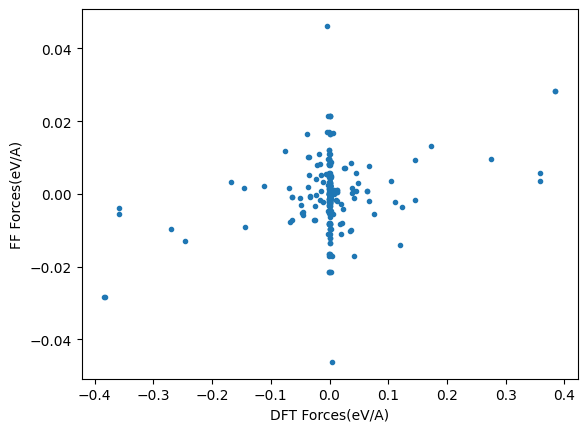

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.concatenate(t_f).flatten(),np.concatenate(al_f).flatten(),'.')
plt.xlabel('DFT Forces(eV/A)')
plt.ylabel('FF Forces(eV/A)')

Text(0, 0.5, 'FF Energy(eV)')

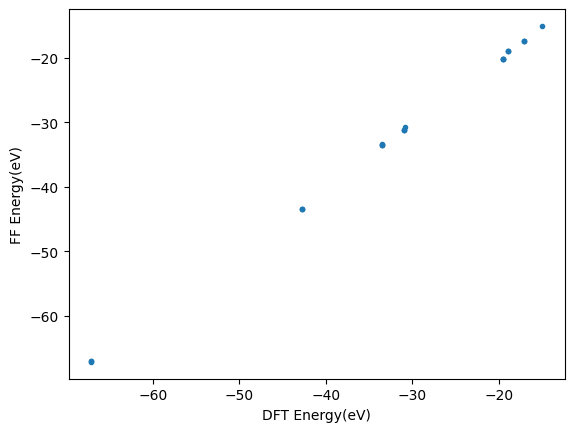

In [8]:
plt.plot(t_e,al_e,'.')
plt.xlabel('DFT Energy(eV)')
plt.ylabel('FF Energy(eV)')

Text(0, 0.5, 'FF Stress(eV/A2)')

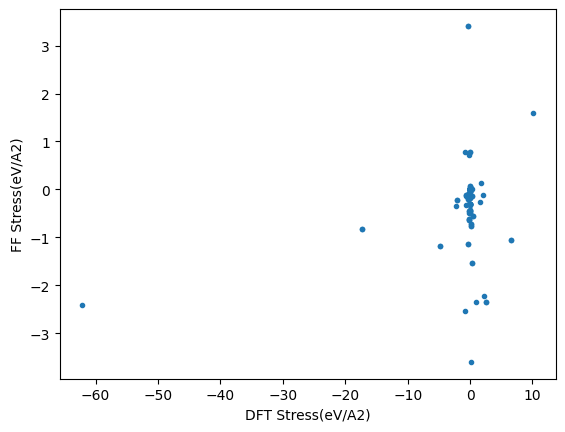

In [9]:
plt.plot(np.concatenate(t_s),-1600*np.concatenate(al_s),'.')
plt.xlabel('DFT Stress(eV/A2)')
plt.ylabel('FF Stress(eV/A2)')

In [10]:
pip install m3gnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 36.7 MB/s eta 0:00:00


In [11]:
from m3gnet.models import M3GNet, M3GNetCalculator, Potential
potential = Potential(M3GNet.load())
calculator = M3GNetCalculator(potential=potential, stress_weight=0.01)

In [12]:
from alignn.ff.ff import default_path,ForceField
from alignn.graphs import Graph
import torch
import os
from jarvis.db.jsonutils import loadjson
from alignn.models.alignn_atomwise import ALIGNNAtomWise,ALIGNNAtomWiseConfig
torch.cuda.is_available = lambda : False
from jarvis.core.atoms import Atoms
from tqdm import tqdm
import numpy as np
from alignn.ff.ff import default_path,ForceField
from jarvis.core.atoms import Atoms
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path
from ase.stress import full_3x3_to_voigt_6_stress
import torch


model_path = default_path()
calc = AlignnAtomwiseCalculator(path=model_path)


def get_alignn_forces(atoms=[]):
    ase_atoms=atoms.ase_converter()
    ase_atoms.calc = calculator #calc
    e = ase_atoms.get_potential_energy()
    f = ase_atoms.get_forces()
    s = ase_atoms.get_stress()
    return e,f,s

torch.cuda.is_available = lambda : False
mg=[]

al_e=[]
al_f=[]
al_s=[]

t_e=[]
t_f=[]
t_s=[]
for ii,i in tqdm(enumerate(ff_db[:25])):
    #if ii<10:
        atoms = Atoms.from_dict(i['atoms'])
        #mg_f = get_m3gnet_forces(atoms)
        #mg.append(np.array(mg_f).flatten())
        e,f,s = get_alignn_forces(atoms)
        al_e.append(e)
        t_e.append(i['total_energy']*atoms.num_atoms)
        
        al_f.append(np.array(f).flatten())
        t_f.append(np.array(i['forces']).flatten())
        ts=full_3x3_to_voigt_6_stress(i['stresses'])
        al_s.append(np.array(s).flatten())
        t_s.append(np.array(ts).flatten())
        


model_path /content/alignn/alignn/ff


0it [00:00, ?it/s]WARNING:tensorflow:You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.
1it [00:16, 16.82s/it]WARNING:tensorflow:You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.
5it [00:23,  3.84s/it]WARNING:tensorflow:You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.
10it [00:33,  2.49s/it]WARNING:tensorflow:You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.
25it [00:40,  1.63s/it]


Text(0, 0.5, 'FF Forces(eV/A)')

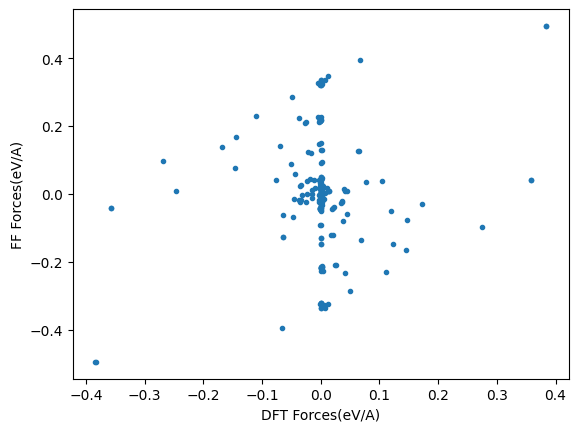

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.concatenate(t_f).flatten(),np.concatenate(al_f).flatten(),'.')
plt.xlabel('DFT Forces(eV/A)')
plt.ylabel('FF Forces(eV/A)')

Text(0, 0.5, 'FF Energy(eV)')

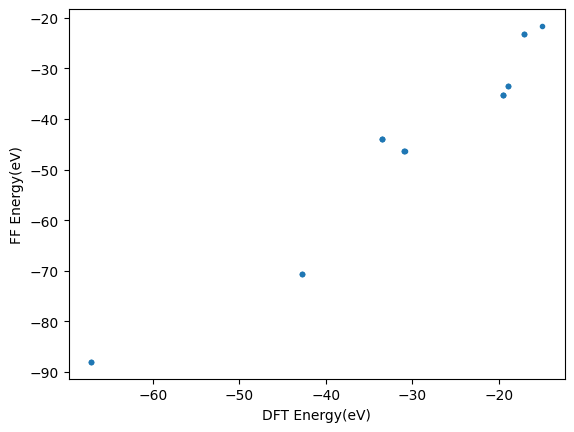

In [14]:
plt.plot(t_e,al_e,'.')
plt.xlabel('DFT Energy(eV)')
plt.ylabel('FF Energy(eV)')

Text(0, 0.5, 'FF Stress(eV/A2)')

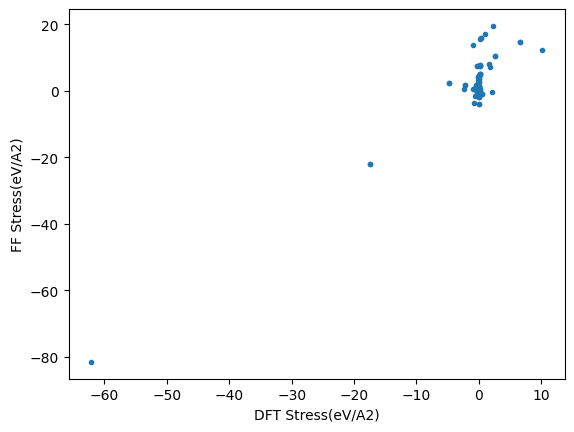

In [15]:
plt.plot(np.concatenate(t_s),-1600*np.concatenate(al_s),'.')
plt.xlabel('DFT Stress(eV/A2)')
plt.ylabel('FF Stress(eV/A2)')